# Assignment 3
### Due 9/23. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nhanes = pd.read_csv('data/nhanes_data_17_18.csv')
nhanes

/var/folders/k2/xkhh4x_x2999dprlhrz1h_r00000gn/T/ipykernel_6345/3018992235.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv('data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# General Health Condition
nhanes['GeneralHealthCondition_na']=nhanes['GeneralHealthCondition'].isna()
nhanes['GeneralHealthCondition_na'].value_counts()

GeneralHealthCondition_na
False    5964
True     2402
Name: count, dtype: int64

There are 2,402 missing values for the general health condition variable.

In [4]:
# Race/Hispanic Origin
nhanes['RacehispanicOrigin_na']=nhanes['RacehispanicOrigin'].isna()
nhanes['RacehispanicOrigin_na'].value_counts()

RacehispanicOrigin_na
False    8366
Name: count, dtype: int64

There are 0 missing values for the race/hispanic origin variable.

In [5]:
nhanes['RacehispanicOrigin'].value_counts()

RacehispanicOrigin
Non-Hispanic White                     2792
Non-Hispanic Black                     1949
Other Race - Including Multi-Racial    1658
Mexican American                       1229
Other Hispanic                          738
Name: count, dtype: int64

In [6]:
nhanes['GeneralHealthCondition'].value_counts()

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [7]:
pd.crosstab(nhanes['GeneralHealthCondition'], nhanes['RacehispanicOrigin'], normalize='columns')

RacehispanicOrigin,Mexican American,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Other Race - Including Multi-Racial
GeneralHealthCondition,,,,,
Excellent,0.083431,0.096029,0.103083,0.076923,0.142226
Fair or,0.263220,0.226715,0.160405,0.282692,0.138693
Good,0.470035,0.410830,0.384875,0.390385,0.426678
Poor?,0.041128,0.028159,0.031310,0.021154,0.019435
Very good,0.142186,0.238267,0.320328,0.228846,0.272968


Since the numbers of each race/ethnicity group didn't clearly show me any sort of relationship, I decided to normalize the counts so I could see the breakdown proportionally instead. 
- Unsurprisingly, it seems that the Non-Hispanic White group may have better overall general health than marginalized groups. While a small proportion of each race/ethnicity could say that their general health was "excellent", we can look to the "Very Good" response to see that about 32% of Non-Hispanic White individuals thought their health was very good, while only about 27% or less of the other groups reported "Very Good" general health. 
- Because the "Other Race - Including Multiracial" group is a bit broad and ambigious, I don't think I can make any conclusive inferences about this subpopulation, since not everyone in that group is of the same race/ethnicity. 

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

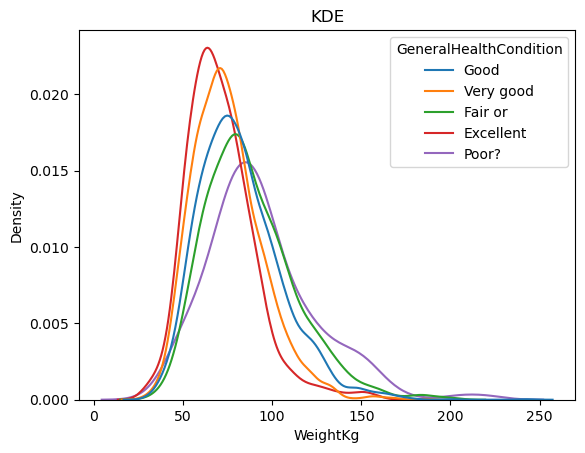

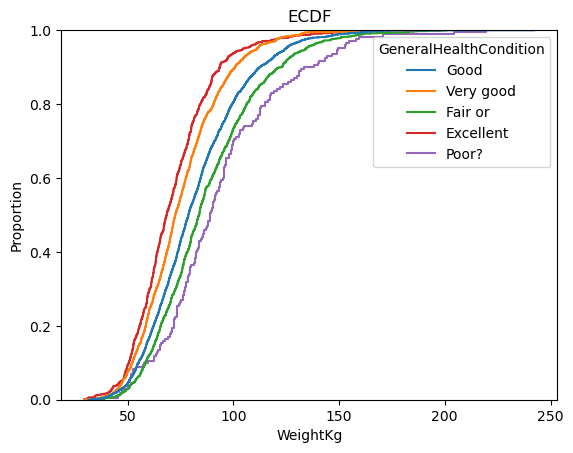

WeightKg                                             \
                          count       mean        std   min     25%    50%   
GeneralHealthCondition                                                       
Excellent                 612.0  71.188399  19.169784  29.4  58.475  68.45   
Fair or                  1152.0  87.445920  25.361884  33.4  69.300  83.80   
Good                     2431.0  81.973015  23.289469  31.4  65.200  78.70   
Poor?                     170.0  93.521176  30.141754  36.8  73.550  89.05   
Very good                1534.0  75.136441  19.746632  29.3  60.700  72.50   

                                        
                            75%    max  
GeneralHealthCondition                  
Excellent                80.725  158.7  
Fair or                 101.700  200.9  
Good                     95.200  242.6  
Poor?                   109.275  219.6  
Very good                85.800  185.0

In [8]:
health_condition = 'GeneralHealthCondition'
weight= 'WeightKg'
sns.kdeplot( data=nhanes, x=weight, hue=health_condition, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=nhanes, x=weight, hue=health_condition).set(title='ECDF')
plt.show()
nhanes.loc[:,[weight, health_condition]].groupby(health_condition).describe()

As I expected, as an individual's weight in kilograms goes up, they tend to report worser general health. This pattern is easy to interpret from the ECDF, where we can see that those in the "Excellent" health group weigh the least, then those in the "Very Good" group, then the "Good" group, then the "Fair" group, and finally the "Poor" group, where these individuals weigh the most (on average). This is also reflected in the 50th quantile values in the table.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

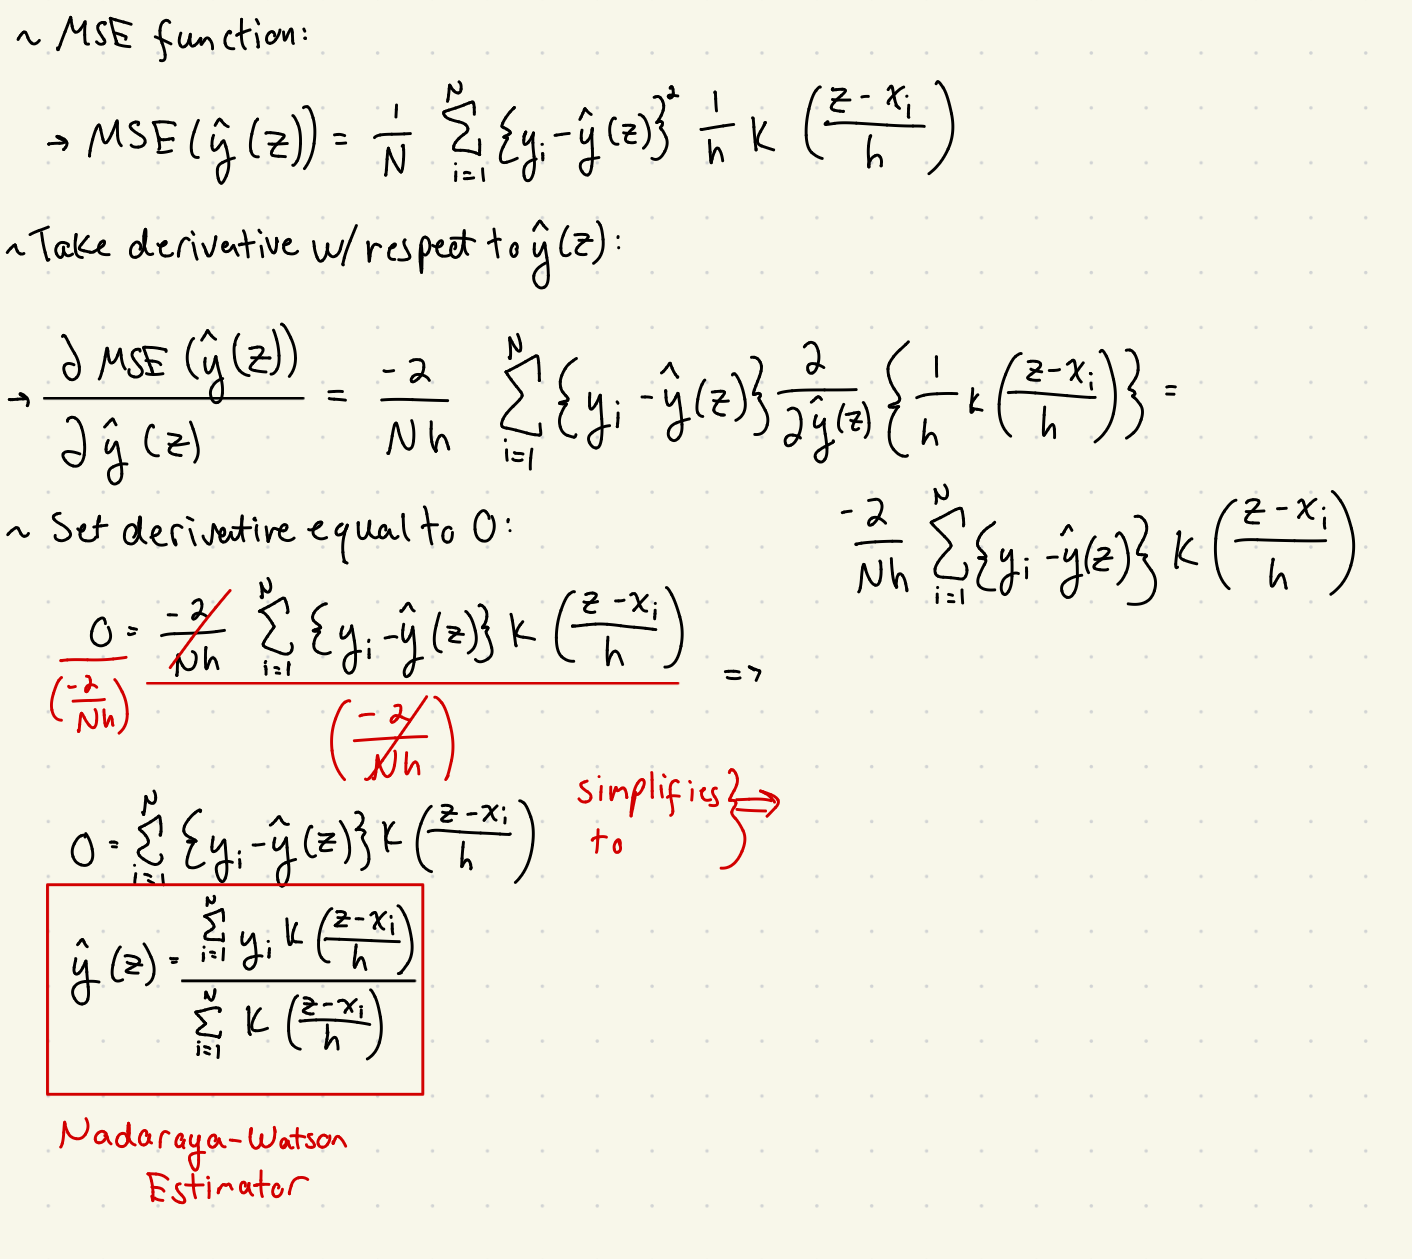

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [70]:
colleges = pd.read_csv('./data/college_completion.csv')

In [16]:
colleges['aid_v_na'] = colleges['aid_value'].isna()
colleges['aid_v_na'].value_counts()

aid_v_na
False    3797
True        1
Name: count, dtype: int64

In [17]:
colleges['endow_v_na'] = colleges['endow_value'].isna()
colleges['endow_v_na'].value_counts()

endow_v_na
False    2323
True     1475
Name: count, dtype: int64

Computed bandwidth is: 11.933243102231405


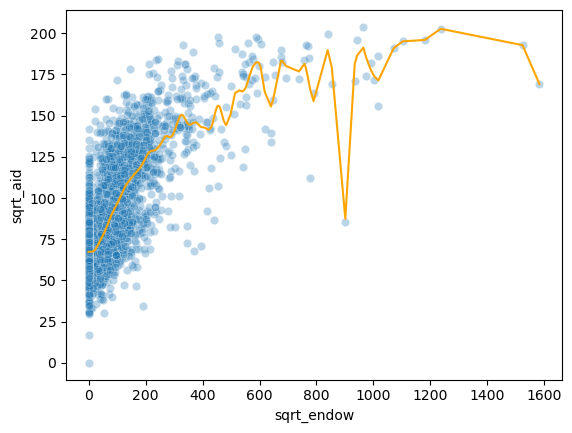

In [ ]:
colleges['sqrt_aid'] = np.where(colleges['aid_value'] > 0, np.sqrt(colleges['aid_value']), 0)
colleges['sqrt_endow'] = np.where(colleges['endow_value'] > 0, np.sqrt(colleges['endow_value']), 0)

x = colleges['sqrt_endow']
y = colleges['sqrt_aid']

def lcls(x, y, h=None, plot=True):
    '''Computes local constant least squares regression estimates with Gaussian kernel.'''

    n = len(x)  # Number of observations
    grid = np.sort(x.unique())  # Extract and sort unique values for x

    # Compute bandwidth, if none provided:
    if h is None:
        if np.all(x == x[0]):  # Check if all x values are the same
            h = 1  # Set a default value for h if all x values are the same
        else:
            iqr = np.quantile(x, 0.75) - np.quantile(x, 0.25)
            h = 0.9 * min(np.std(x), iqr / 1.34) * len(x) ** (-0.2)
            print(f'Computed bandwidth is: {h}')

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1, 1) - grid.reshape(1, -1)) ** 2
    K = np.exp(I / (2 * h ** 2)) / np.sqrt(2 * np.pi * h ** 2)

    # Compute LCLS estimator:
    numerator = y @ K  # Compute the numerator
    denominator = np.sum(K, axis=0)  # Compute denominator
    y_hat = numerator / denominator  # Compute estimator

    # Plot results:
    if plot:
        sns.scatterplot(data=colleges, y='sqrt_aid', x='sqrt_endow', alpha=0.3)
        sns.lineplot(x=grid, y=y_hat, color='orange')

    return y_hat, grid
y_hat, grid = lcls(x,y)

An explanation for this COULD be that schools with a higher endowment may be less likely to report said endowment. But simply put, the higher a college's endowment is, the more financial aid they can give out. Of course, there are a plethora of other reasons why a school gives out a certain amount of aid, one most likely being the socio-economic status (SES) of a given class of students.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome